In [1]:
import timeit
import matplotlib.pyplot as plt
from linear_data_structure import Queue, EndRearQueue

plt.style.use('seaborn')

In [2]:
en_t = timeit.Timer('q.enqueue(0)', 'from __main__ import q')
de_t = timeit.Timer('q.dequeue()', 'from __main__ import q')

sizes = range(10000, 1000001, 20000)
number = 1000

q_en_times = []
q_de_times = []
eq_en_times = []
eq_de_times = []

for s in sizes:
    
    q = Queue()
    q.items = list(range(s))
    q_en_times.append(en_t.timeit(number=number))
    q_de_times.append(de_t.timeit(number=number))
    
    q = EndRearQueue()
    q.items = list(range(s))
    eq_en_times.append(en_t.timeit(number=number))
    eq_de_times.append(de_t.timeit(number=number))

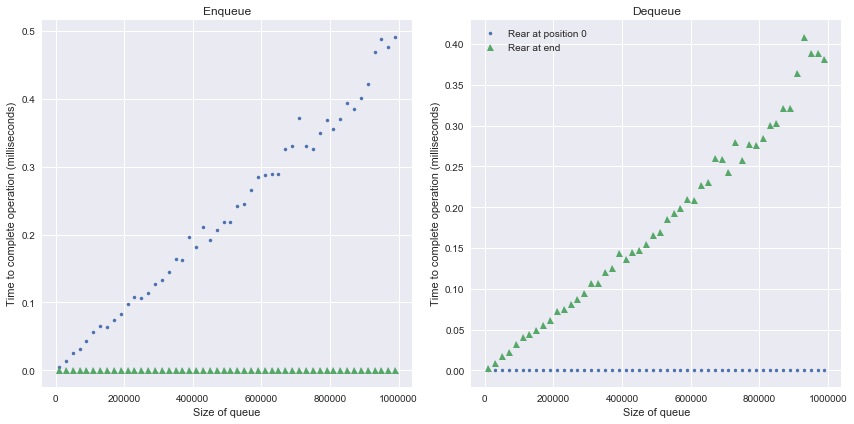

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (q_times, eq_times, title) in enumerate(zip(
    [q_en_times, q_de_times], [eq_en_times, eq_de_times], ['Enqueue', 'Dequeue'])):
    
    axes[i].plot(sizes, q_times, marker='.', linestyle='none',
                 label='Rear at position 0')
    axes[i].plot(sizes, eq_times, marker='^', linestyle='none',
                 label='Rear at end')
    axes[i].set_xlabel('Size of queue')
    axes[i].set_ylabel('Time to complete operation (milliseconds)')
    axes[i].set_title(title)

plt.legend()
plt.tight_layout()
plt.show()